# Impact of Bremstrahlung for HF tracks

Ok, so I was wondering why the GEANT track $p_T$ spectrum appeared harder for HF-jets than for l-jets.

<img src="../../figures/newTrkLabel/pt_GEANT.pdf" width="400">

One hypothesis that I had was that maybe there was that maybe the more energetic HF tracks were interacting more and emitting more breaking radiation.

Michael said that he didn't think this was the case, because most of the tracks in jets are pions, which are *much* heavier than electrons.

But to confirm this, Michael said I should *look at the Bethe-Bloch formula*, and compare the expected energy loss by Brem for electrons and pions at the same energy.


**Stopping power at intermediate energies**

$$- \left< \frac{dE}{dx} \right> = K z^2 \frac{Z}{A} \frac{1}{\beta^2} \left[ \frac{1}{2} \ln \frac{2 m_e c^2 \beta^2 \gamma^2 T_{max}}{I^2} - \beta^2 - \frac{ \delta (\beta \gamma ) }{2}  \right] $$


Hmmmmm... but in reading through the energy loss in materials section of the pdg, I wasn't convinced that the Bethe Bloch formula was the one that I was supposed to use, because Michael said we were looking for the expected E loss from Bremstrahlung.



**Bremstrahlung and Radiation Length**

I also found this [resource](https://indico.cern.ch/event/294651/contributions/671929/attachments/552041/760669/Delmastro_ESIPAP2014_3.pdf)

$$ \frac{dE}{dx} = 4 \alpha N_A \frac{z^2 Z^2}{A} \left( \frac{1}{4\pi \epsilon_0} \frac{e^2}{m c^2} \right) ^2 E \ln \frac{183}{Z^{1/3} } $$

- $\alpha$ : fine structure constant
- $N_A$ : Avogadro's number $6.0221415 × 10^{23} mol^{−1}$
- z: The charge of the incident p'cle
- $Z$: The atomic number of the detetor material, i.e, 14 for Si
- $A$ The atomic mass of the detecor
- $E$ the energy of the incident particle

By dimensional anaysis, we see that we need to mutliply this number by the density of the absorber to get a quantity that has dimensions [E] / [L].

**Plan:** Let's code this up and gain some intuition!

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
alpha = 1/137.03599911
NA = 6.0221415e23 # mol^-1
z = 1
Z = 14
A = 28.085 # g / mol
hbar_c = 197e-9 # eV*m
rho = 2.57e6 # g/m^3


# The only things that we're going to vary in this formula
m_e_csqd = 511e3 # eV
m_pi_csqd = 139.571e6 # eV

Just modify the formula a bit to correspond to the variables I'm inputting.

$$ \frac{dE}{dx} = 4 \alpha N_A \frac{z^2 Z^2}{A} \left( \frac{\alpha \hbar c}{m c^2} \right) ^2 E \ln \frac{183}{Z^{1/3} } $$

In [5]:
def dEdx(E,m):
    '''
    Get dE/dx as a function of the particle's energy for a
    given incident particle mass.
    '''
    
    y = 4*alpha*NA * z**2 * Z**2 / A * (alpha*hbar_c/m)**2 * E * np.log(183/np.power(Z,1/3))
    return y

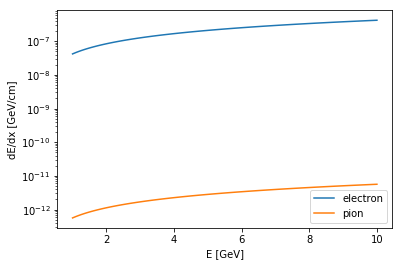

In [6]:
E = np.linspace(1,10,100)* 1e9 # eV

plt.semilogy(E*1e-9, dEdx(E,m_e_csqd)*1e-11,label='electron')
plt.semilogy(E*1e-9, dEdx(E,m_pi_csqd)*1e-11,label='pion')
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel('dE/dx [GeV/cm]')
plt.show()

So the electron is much more likely to Brem than a pion, which makes sense!

For Si, the $\left<\frac{dE}{dx}\right>$ = 3.88 MeV / cm [for a mip](https://indico.cern.ch/event/658724/contributions/2685772/attachments/1505104/2345095/SSD-SummiWorkshop-2017-Silicon-Radiation_Damage_Intro-1700807a.pdf).